In [1]:
%matplotlib inline
from obspy import read, UTCDateTime as UTC
from obspy.signal.cross_correlation import correlation_detector
import obspy
import io
import matplotlib.pyplot as plt
import helpers
import numpy as np
import pandas as pd

from obspy.signal import trigger
from obspy.signal import filter

from datetime import datetime

from multiprocessing import Pool
import glob

import tempmatch as tm

from scipy.fft import fft, fftfreq


In [2]:
data = tm.digest_data('/media/sda/data/robdata/Hydrophones/DAYS/B00/B00.7F.01.GDH.2019.138')


In [34]:
# templates = data.select(id='7F.B00.01.GDH').slice(UTC('2019-05-18T14:36:16.178Z'), UTC('2019-05-18T14:36:16.304Z'))
templates = data.select(id='7F.B00.01.GDH').slice(UTC('2019-05-18T14:36:16.158Z'), UTC('2019-05-18T14:36:16.304Z'))


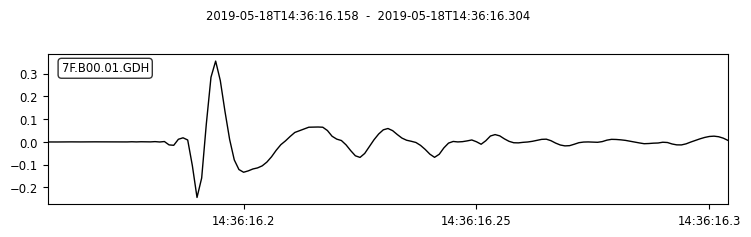

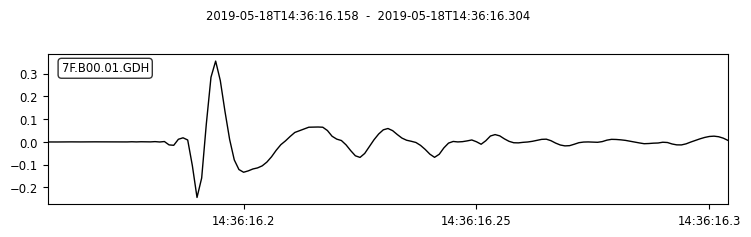

In [35]:
templates.plot()

In [36]:
data = tm.digest_data('/media/sda/data/robdata/Hydrophones/DAYS/B00/B00.7F.01.GDH.2019.138')


In [37]:
data_eq = tm.digest_data('/media/sda/data/robdata/Hydrophones/DAYS/B00/B00.7F.01.GDH.2019.121')


In [38]:
templates_eq = data_eq.select(id='7F.B00.01.GDH').slice(UTC('2019-05-01T15:48:33.0Z'), UTC('2019-05-01T15:48:34.0Z'))


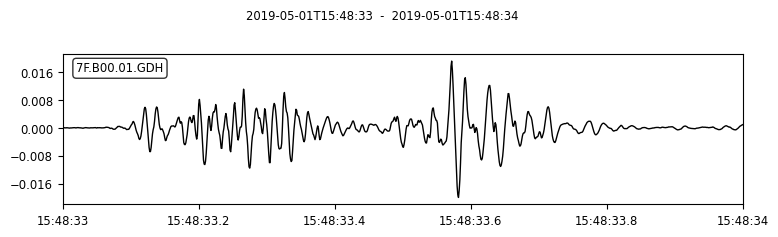

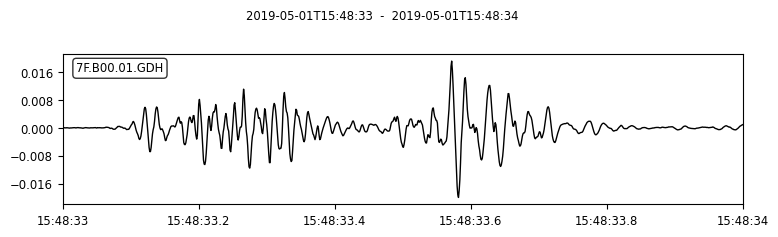

In [39]:
templates_eq.plot()

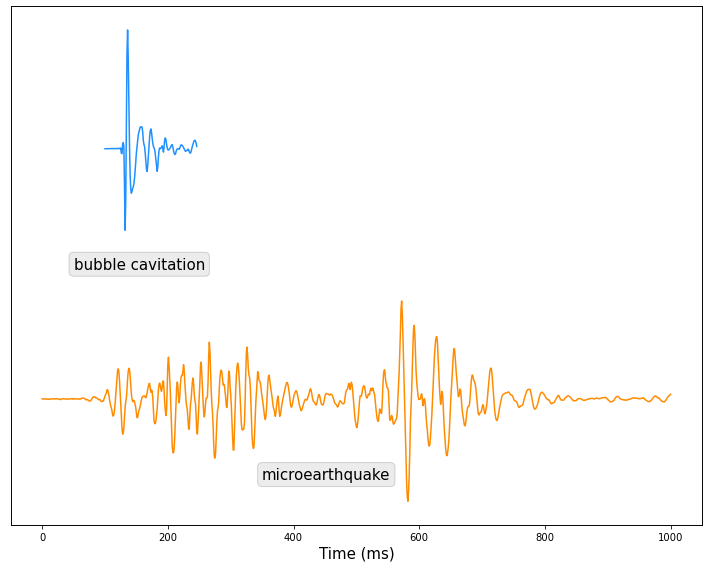

In [102]:
y = templates[0].data
y = y/(y.max() - y.min())
x = np.arange(0, templates[0].times().shape[0], 1)

y_eq = templates_eq[0].data
y_eq = y_eq/(y_eq.max() - y_eq.min())
x_eq = np.arange(0, templates_eq[0].times().shape[0], 1)

fig, ax = plt.subplots(figsize=(10, 8))

ax.set_yticks([])

ax2 = ax.twinx()

ax2.plot(x+100, y+1.25, color='dodgerblue')

ax2.plot(x_eq, y_eq, color='darkorange')

ax2.text(s='bubble cavitation', x=50, y=0.65, fontsize=15, bbox=dict(facecolor='grey', alpha=0.15, boxstyle='round'))
ax2.text(s='microearthquake', x=350, y=-0.4, fontsize=15, bbox=dict(facecolor='grey', alpha=0.15, boxstyle='round'))

ax2.set_yticks([])
# ax2.set_yticks([0, 1])
# ax2.set_yticklabels(['microearthquake', 'bubble cavitation'], fontsize=15)

ax.set_xlabel('Time (ms)', fontsize=15)

fig.tight_layout()
fig.savefig('example_temps.png', dpi=300, bbox_inches='tight')

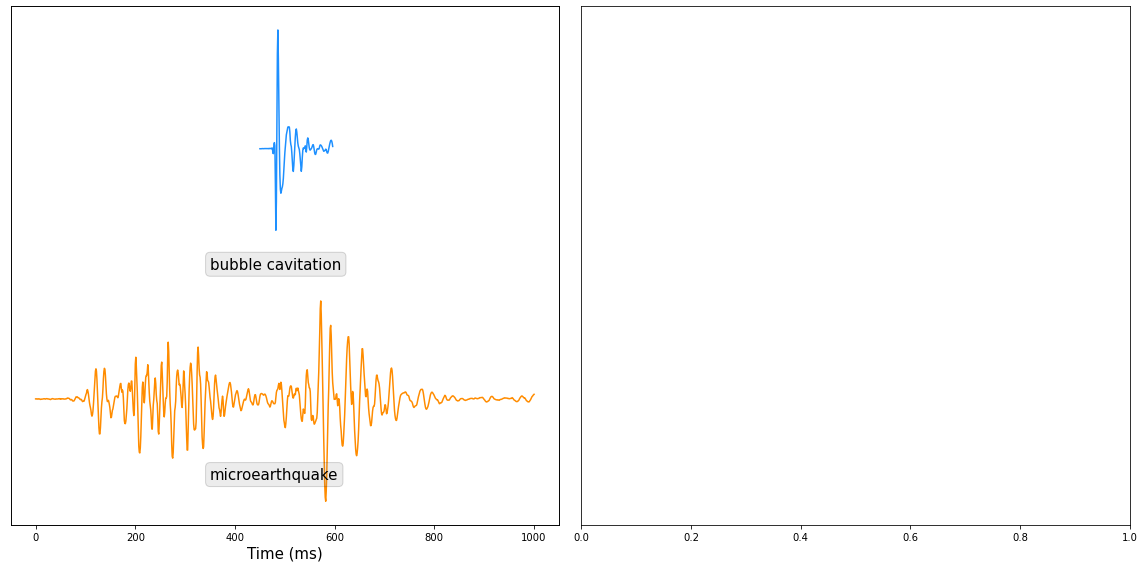

In [260]:
y = templates[0].data
y = y/(y.max() - y.min())
x = np.arange(0, templates[0].times().shape[0], 1)

y_eq = templates_eq[0].data
y_eq = y_eq/(y_eq.max() - y_eq.min())
x_eq = np.arange(0, templates_eq[0].times().shape[0], 1)

fig, (ax, ax3) = plt.subplots(1, 2, figsize=(16, 8), sharey=True)

ax.set_yticks([])

ax2 = ax.twinx()

ax2.plot(x+450, y+1.25, color='dodgerblue')

ax2.plot(x_eq, y_eq, color='darkorange')

ax2.text(s='bubble cavitation', x=350, y=0.65, fontsize=15, bbox=dict(facecolor='grey', alpha=0.15, boxstyle='round'))
ax2.text(s='microearthquake', x=350, y=-0.4, fontsize=15, bbox=dict(facecolor='grey', alpha=0.15, boxstyle='round'))

ax2.set_yticks([])
# ax2.set_yticks([0, 1])
# ax2.set_yticklabels(['microearthquake', 'bubble cavitation'], fontsize=15)

ax.set_xlabel('Time (ms)', fontsize=15)

fig.tight_layout()
# fig.savefig('example_temps.png', dpi=300, bbox_inches='tight')

In [90]:
rms_noise = data.slice(UTC('2019-05-18T06:00:00.0Z'), UTC('2019-05-18T17:00:00.0Z'))

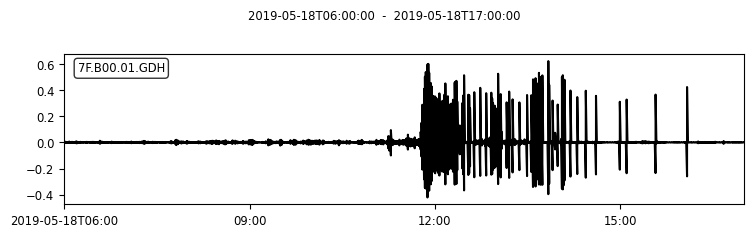

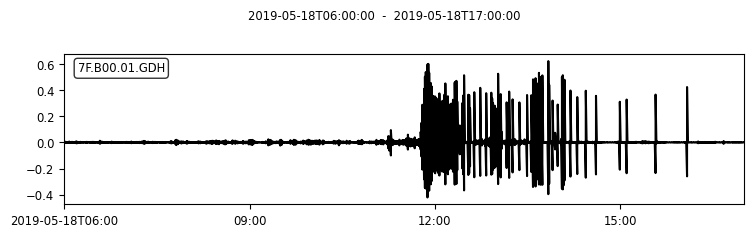

In [91]:
rms_noise.plot()

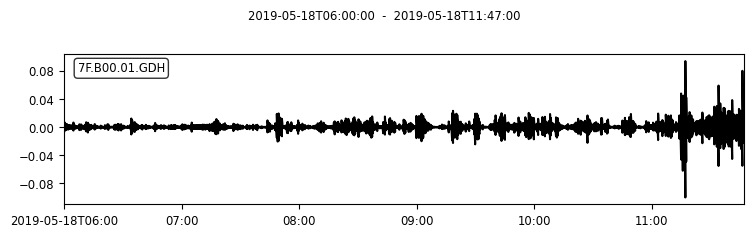

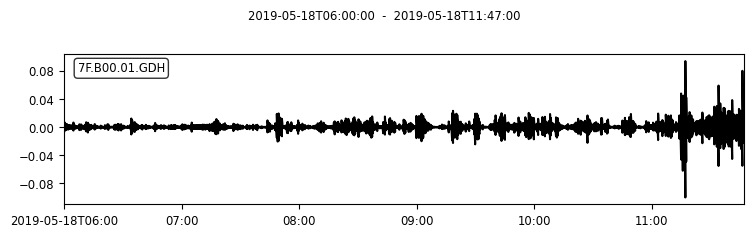

In [97]:
rms_noise2 = data.slice(UTC('2019-05-18T06:00:00.0Z'), UTC('2019-05-18T11:47:00.0Z'))
rms_noise2.plot()

In [103]:
ct_data_loc = '/media/sda/data/borehole/ct_scans/807C5705B126Z02/ct_image.mat'

In [131]:
import scipy.io
mat = scipy.io.loadmat(ct_data_loc)
mat = mat['A'].astype(np.float64)
mat[mat == -2000.] = np.nan

In [ ]:
mat.shape

In [134]:
mat.max()

nan

''

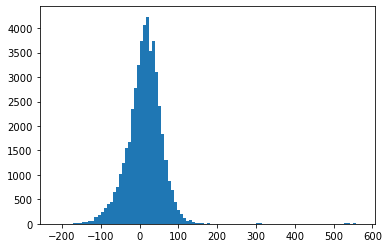

In [138]:
plt.hist(mat[:,0].flatten(), bins=100)
''

In [177]:
mat[259].shape

(512, 1504)

In [178]:
mat.shape

(512, 512, 1504)

In [183]:
mat.transpose().shape

(1504, 512, 512)

In [197]:
mat[15].shape

(512, 1504)

In [202]:
mat[0:, 0:, 15].shape

(512, 512)

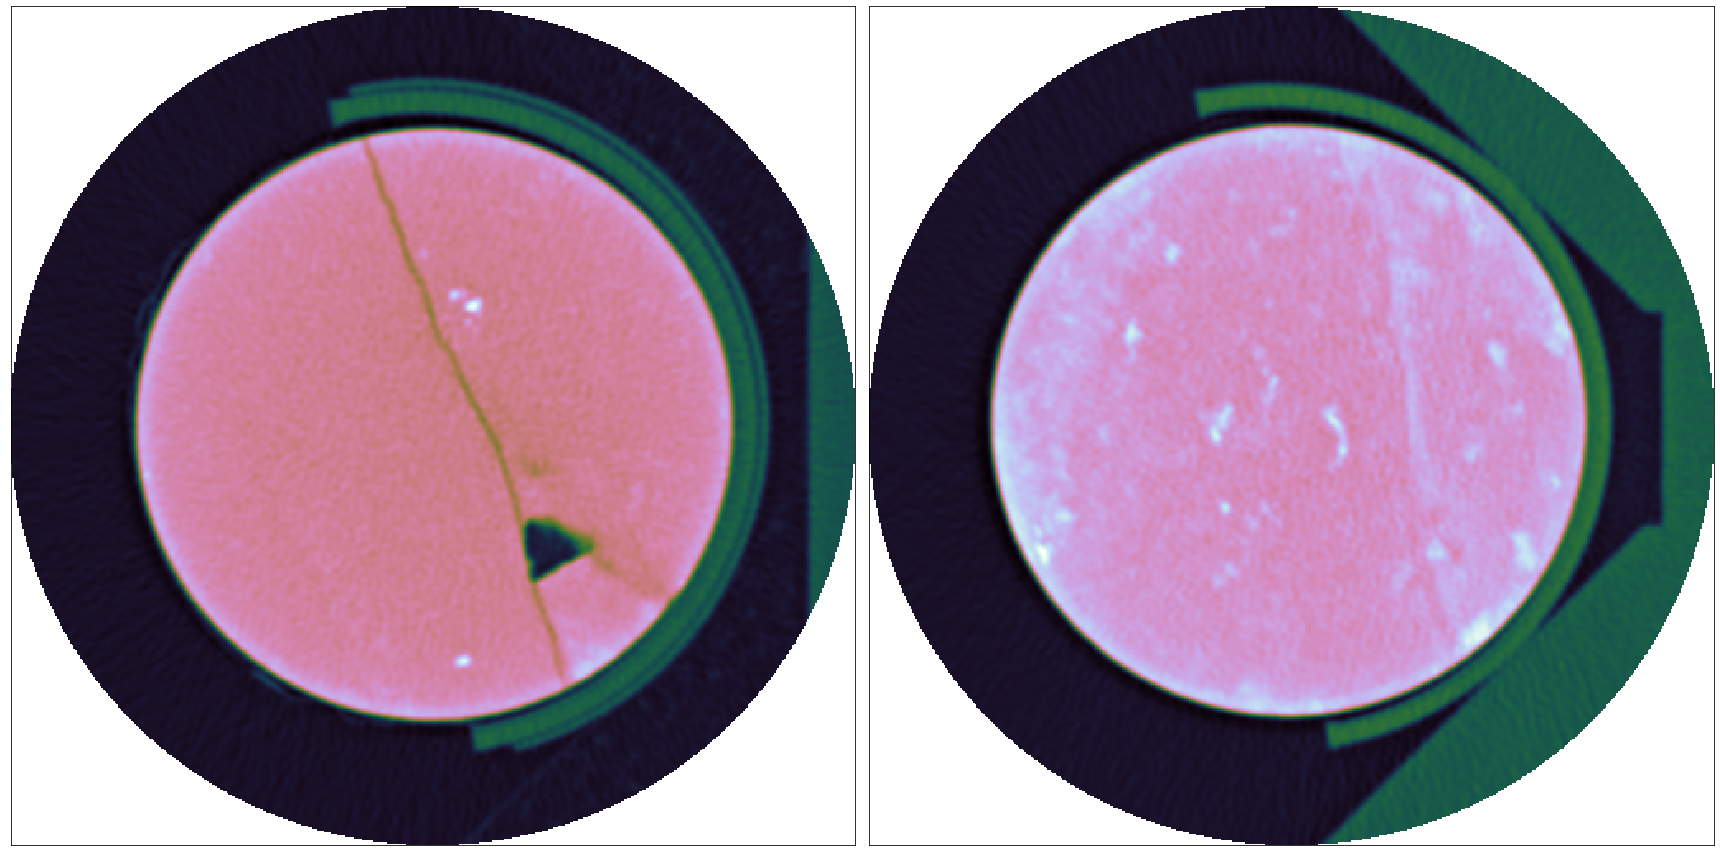

In [248]:
fig, (ax, ax2) = plt.subplots(1, 2, figsize=(24, 12), sharex=True, sharey=True)
cbar = ax.pcolormesh(mat[0:, 0:, 15].transpose(), cmap='cubehelix')
cbar = ax2.pcolormesh(mat[0:, 0:, 600].transpose(), cmap='cubehelix')
# fig.colorbar(cbar)
ax.set_yticks([])
ax.set_xticks([])
fig.tight_layout()

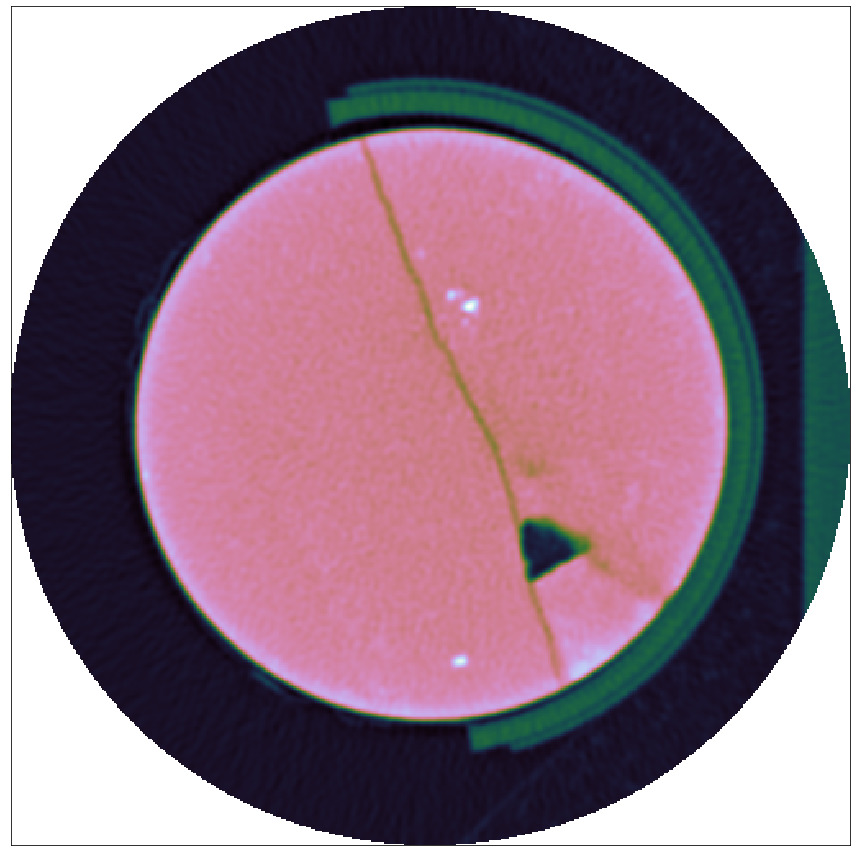

In [250]:
fig, ax = plt.subplots(figsize=(12, 12), sharex=True, sharey=True)
cbar = ax.pcolormesh(mat[0:, 0:, 15].transpose(), cmap='cubehelix')
# cbar = ax2.pcolormesh(mat[0:, 0:, 600].transpose(), cmap='cubehelix')
# fig.colorbar(cbar)
ax.set_yticks([])
ax.set_xticks([])
fig.tight_layout()
fig.savefig('ctscan.png', dpi=300, bbox_inches='tight')